# Data Visualization


Sometimes tabular data contains too much information for viewers to absorb. Hence representing such data using the right visuals can produce more meaningful insights and highlight important information and relations accordingly.

We will be using `matplotlib` and `seaborn` as our two visualization libraries for python.

**External Readings**
1. Why data visualization is important: https://hdsr.mitpress.mit.edu/pub/zok97i7p/release/3
2. Visualizing with matplotlib: https://www.nobledesktop.com/learn/python/data-visualization-matplotlib
3. Choosing the right chart type: https://infogram.com/page/choose-the-right-chart-data-visualization
4. Choosing the right visualization: https://guides.lib.berkeley.edu/data-visualization/type
5. Univariate visualizations: http://www.sfu.ca/~lockhart/richard/101/12_1/lectures/univariate/web.pdf

In [85]:
# Install matplotlib and seaborn
# you only need to do this once. 
!pip install matplotlib
!pip install seaborn

Let's start with a database of Diamonds found on Kaggle and see what we can visualize from that. 

In [86]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
# Billionaire's data import 
data = pd.read_csv(r'F:\projects\karachi-ai\Introduction to Python\notebooks\c3\diamonds.csv', index_col=0)

In [88]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [89]:
print(data.shape)

(53940, 10)


We have a total of 10 columns and 53940 rows. Let's use `info()` function on our data to learn more about its types.

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


As we can see here, we do not have any null values in any of the columns. That's great. (most datasets on Kaggle may be pre-cleaned ready to dive into, though it won't always be the case with real-life datasets).

Here are the column description as taken from Kaggle[https://www.kaggle.com/shivam2503/diamonds]:
- **price:** price in US dollars (USD 326- USD 18,823)
- **carat:** weight of the diamond (0.2--5.01)
- **cut:** quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- **color:** diamond colour, from J (worst) to D (best)
- **clarity:** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- **x:** length in mm (0--10.74)
- **y:** width in mm (0--58.9)
- **z:** depth in mm (0--31.8)
- **depth:** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- **table:** width of top of diamond relative to widest point (43--95)

To get a visual understanding of how a diamond really differs in looks I would recommend checking out this link [https://www.gemsociety.org/article/diamond-clarity/] 

## Univariate and Multivariate Visualizations
The above description gives a pretty good idea about our dataset (count of categorical variables, ranges of numerical variables, etc.). So we are ready to get started with visualizations. 

Now there are two kinds of visualizations we are interested in. **Univariate** and **Multivariate**. 

Univariate visuals are those concerned with a single variables. Examples of univariate include Boxplots, bar charts, pie charts and histogram. Whereas, multivariate include more than one variable(s) and concerned with seeing how one variable changes wrt to others. This includes line plots, 3D charts, scatter plots, etc. 


**Try it Yourself**

Make an educated guess on which of these columns or "features" can we visualize using univariate and multivariate charts?

### Univariate Visuals

We will start with univariate visuals. We have 3 categorical variables that we can use here. Let's validate whether they actually have the range of values as described. For this we will use `unique()` function on these respective columns: `cut, color, clarity`.


In [91]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [92]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [93]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

Before we dive into plotting, we need to know what questions we are willing to answer using our dataset. Here are some:
- What color diamonds are most common?
- What type of clarity is most common in diamonds?
- What is the distribution of carat?
- How does price relate to carat?
- How does price relate to depth?


These are some questions however the list is exhaustive. Can you think of more questions to add here?

So, let's start with answering the first question: most common diamond by colors? For that, we first need by color count for our diamond dataset.

In [94]:
# new function alert: value counts! Note: a little computationally expensive.
color_counts = data['color'].value_counts()
color_counts

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

### Bar Charts 

Let's first try our hands on bar charts, this is good to assess the distribution of categorical variables. It is very simple and a bar chart requires two arguments primarily:
- x: the values that go on the x axis, in our case, the labels of our categorical data.
- height: the values that go on the y axis, in our case, the values of our categorical data.


Note that we have labels and values of the same variable, not two different variables. Hence, it constitutes a univariate chart.

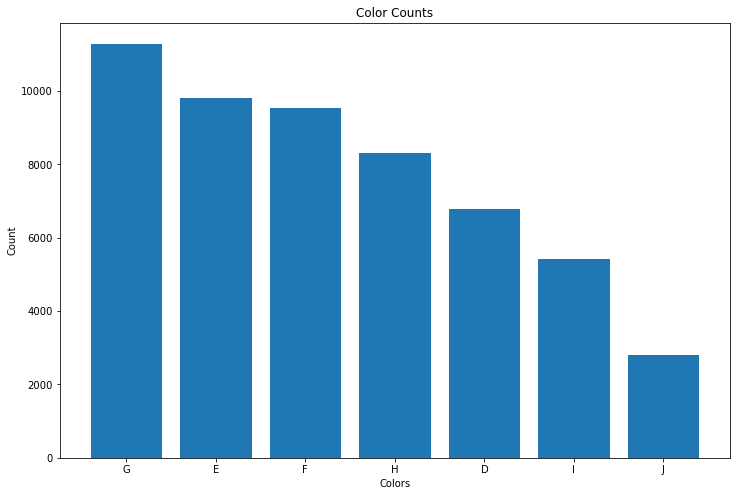

In [95]:
# creating a bar chart 
fig = plt.bar(x=color_counts.index, height=color_counts.values)
# adding supplementary formatting 
plt.title('Color Counts')
plt.xlabel('Colors')
plt.ylabel('Count')
plt.show()

### Pie Charts

That's simple enough. Even though we could estimate from the color counts which color was most common, but looking at the graph, we can say for sure its G! Let's try the same with another type of plot: Pie chart!

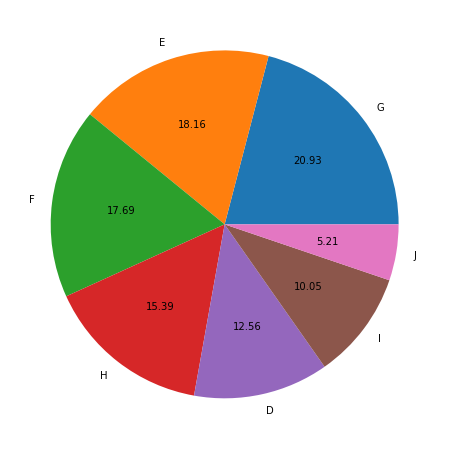

In [96]:
# scaling the size of the visualization
plt.rcParams['figure.figsize'] = [12, 8]

# drawing a pie chart to see breakdown of diamond colors.
# pass 
fig = plt.pie(color_counts, labels=color_counts.index, autopct='%.2f')

So, which color diamond is most abundant?


Okay so for instance, if we wanted to show actual values instead of Percentage values, we would have to do a bit more work.

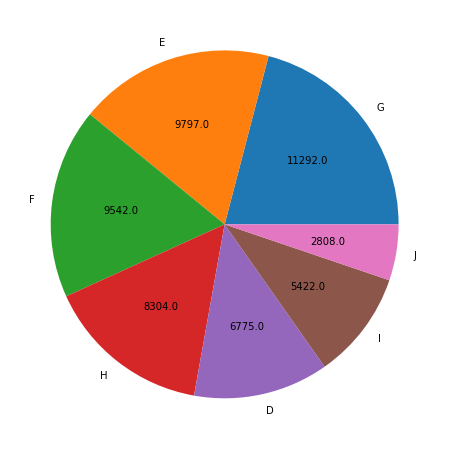

In [97]:
def to_value_as_str(val):
    """
    autopct generates percentages for the data. So if you pass a formula, it'll pass the respective pct value for the item.
    This formula re-converts the percentage back to item value. We know:
    pct_value = item_value / total_items * 100
    Hence, item_value then becomes:
    item_value = (pct_value/100) * total_items
    """
    return str(round(val/100 * color_counts.sum(), 0))

fig = plt.pie(color_counts, labels=color_counts.index, autopct=to_value_as_str)

Neat. However, in most cases, pie charts are not recommended as they tend to occupy a lot of space and give too little information comparative to other charts. It's good to learn however, you always have an alternative available.

**Try it Yourself**

Now that you know a bit about univariate visuals. How about you try to answer the following questions yourself?
- What type of clarity is most common in diamonds?
- What type of cuts are most common in diamonds?

### Histogram 

Similar to how bar charts are for distribution of categorical values, for numerical continuous values, we have histograms. To answer the following question:
- What is the distribution of carat?

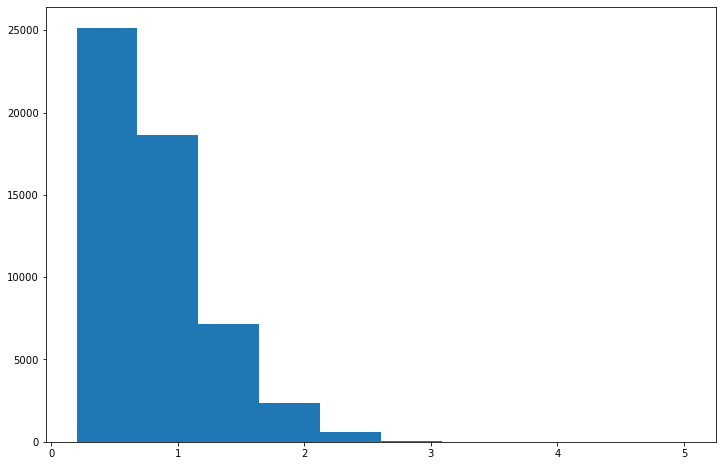

In [98]:
# distribution of carat of diamonds.
details = plt.hist(data['carat'].values)

Here, each bar represents a count of diamonds that fall into a continuous range. The object returned by this function call is stored in `details`. It contains two arrays:
- An array of counts: details[0]
- An array of upper ranges of the bins: details[1]

In [110]:
# view counts for each bin
details[0]
# view upper ranges 
# details[1]

array([2.5155e+04, 1.8626e+04, 7.1290e+03, 2.3490e+03, 6.1400e+02,
       5.3000e+01, 6.0000e+00, 5.0000e+00, 2.0000e+00, 1.0000e+00])

The ranges are equi-distant automatically defined. You can also define the number of bins or ranges to create. For instance, if we wanted 50, we could pass the argument `bin=50` as so:

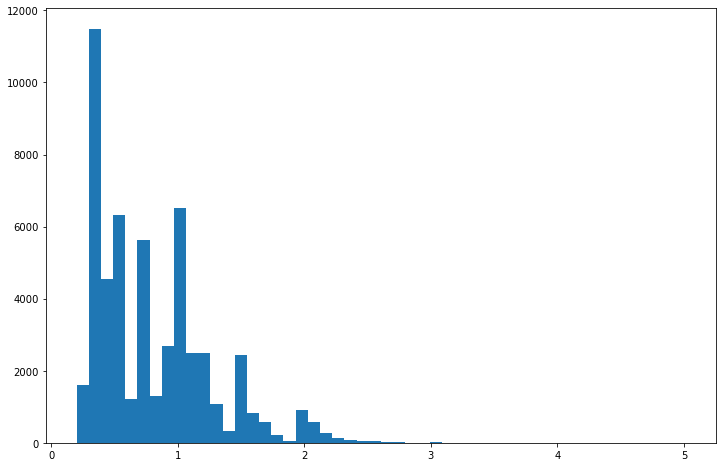

In [104]:
more_details = plt.hist(data['carat'].values, bins=50)

**Try it Yourself**

What other variables can you visualize the distribution of using a histogram? Give it a go.

### Multivariate Visuals 

Now moving on to some multivariate visuals. We currently have the following question in mind:
- What is the relation between price and carat?

Some hypotheses we can start with are:
- are prices higher for higher carats and vice versa?
- are prices lower for higher carats and vice versa?

Since both are numerical data, we can plot a scatter plot between the two to see whether there exists a trend between them. Let's have a look. It takes two main arguments:
- x: the x axis variable 
- y: the y axis variable

Normally, we expect y to vary because of x. In our case, we are expecting price to vary because of carat hence price is our dependent or y variable and carat is our independent or x variable.

Text(0.5, 0, 'carat')

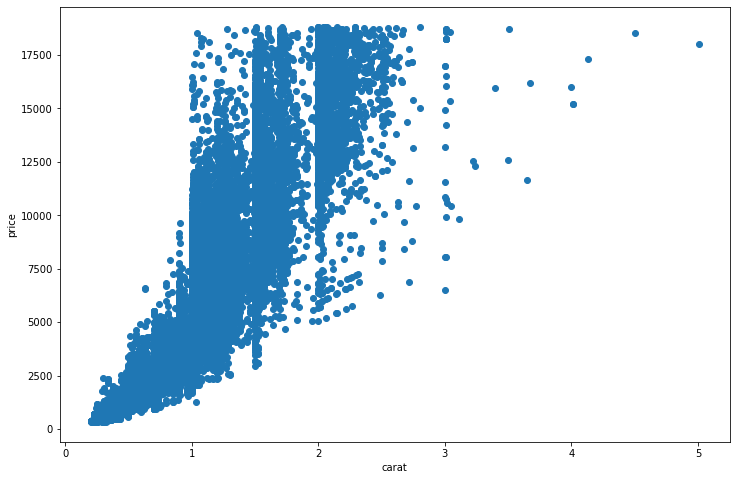

In [117]:
plt.scatter(x=data['carat'], y=data['price'])
# add additional formatting 
plt.ylabel('price')
plt.xlabel('carat')

We see quite a trend here. It is clearly evidend that as carat increases, so does the price of the diamond. 


**Note**: We will discuss correlations and its interpretations in more detail in a later section. For now we are relying on visuals to infer relations.

**Try it Yourself**


Can you determine whether there is a relation between:
- price and depth?
- price and table?

### Same Visuals, Different Library

So far we have managed to visualize plots using `matplotlib`. You can do the same with `seaborn`. The latter however comes with more color options and choices. Let's redo our bar chart.

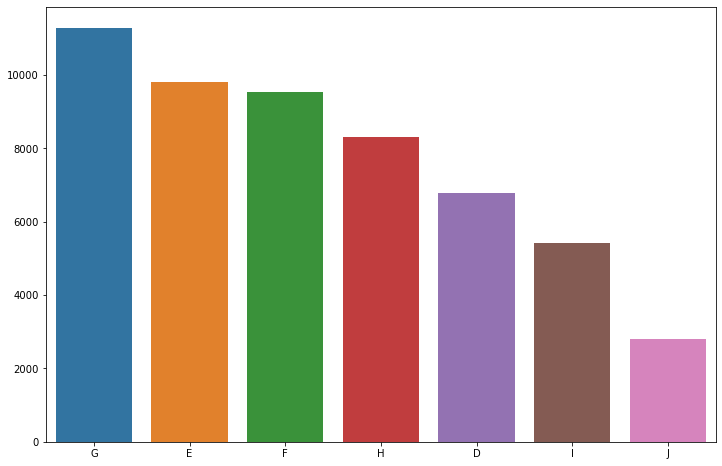

In [148]:
sns.barplot(x=color_counts.index, y=color_counts.values)

You can set `palette` argument to more available paletttes such as:
- muted 
- pastel 
- deep
- bright 
- dark 
- colorblind 

Try them out!

OR, alternatively, you can set colors in the `color` argument by passing the "RGB" value of a single color to make all bars the same color or a list of colors equal to the count of the bars.

In [142]:
# full range of individual colors in SNS 
sns.colors.crayons

{'Almond': '#EFDECD',
 'Antique Brass': '#CD9575',
 'Apricot': '#FDD9B5',
 'Aquamarine': '#78DBE2',
 'Asparagus': '#87A96B',
 'Atomic Tangerine': '#FFA474',
 'Banana Mania': '#FAE7B5',
 'Beaver': '#9F8170',
 'Bittersweet': '#FD7C6E',
 'Black': '#000000',
 'Blue': '#1F75FE',
 'Blue Bell': '#A2A2D0',
 'Blue Green': '#0D98BA',
 'Blue Violet': '#7366BD',
 'Blush': '#DE5D83',
 'Brick Red': '#CB4154',
 'Brown': '#B4674D',
 'Burnt Orange': '#FF7F49',
 'Burnt Sienna': '#EA7E5D',
 'Cadet Blue': '#B0B7C6',
 'Canary': '#FFFF99',
 'Caribbean Green': '#00CC99',
 'Carnation Pink': '#FFAACC',
 'Cerise': '#DD4492',
 'Cerulean': '#1DACD6',
 'Chestnut': '#BC5D58',
 'Copper': '#DD9475',
 'Cornflower': '#9ACEEB',
 'Cotton Candy': '#FFBCD9',
 'Dandelion': '#FDDB6D',
 'Denim': '#2B6CC4',
 'Desert Sand': '#EFCDB8',
 'Eggplant': '#6E5160',
 'Electric Lime': '#CEFF1D',
 'Fern': '#71BC78',
 'Forest Green': '#6DAE81',
 'Fuchsia': '#C364C5',
 'Fuzzy Wuzzy': '#CC6666',
 'Gold': '#E7C697',
 'Goldenrod': '#FCD975',


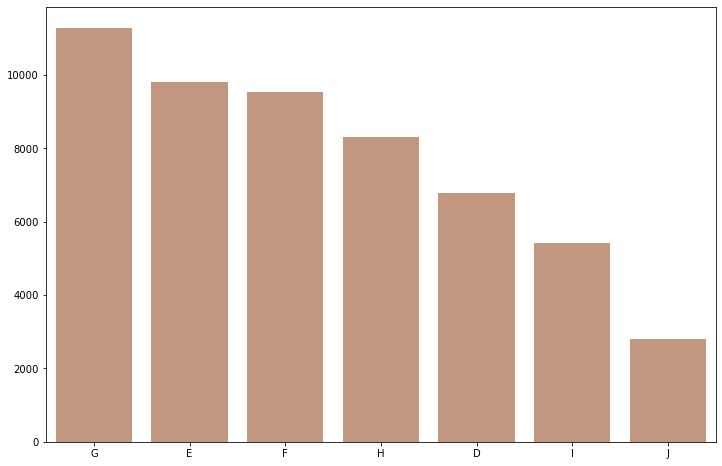

In [157]:
# for color: Antique Brass
sns.barplot(x=color_counts.index, y=color_counts.values, color='#CD9575')

Great.


Next, let's have a look at another type of univariate plot: Box plot.

#### Box Plot

A box plot (or box-and-whisker plot) shows the distribution of quantitative data. It shows:
- Minimum Score:  lowest score, excluding outliers (shown at the end of the left whisker).
Lower Quartile: 25% percent of scores fall below the lower quartile value (also known as the first quartile).
- Median: the median marks the mid-point of the data and is shown by the line that divides the box into two parts (sometimes known as the second quartile). Half the scores are greater than or equal to this value and half are less.
- Upper Quartile: 75% percent of the scores fall below the upper quartile value (also known as the third quartile). Thus, 25% of data are above this value.
- Maximum Score: the highest score, excluding outliers (shown at the end of the right whisker).
- Whiskers: the upper and lower whiskers represent scores outside the middle 50% (i.e. the lower 25% of scores and the upper 25% of scores).
- The Interquartile Range (or IQR): this is the box plot showing the middle 50% of scores (i.e., the range between the 25th and 75th percentile).

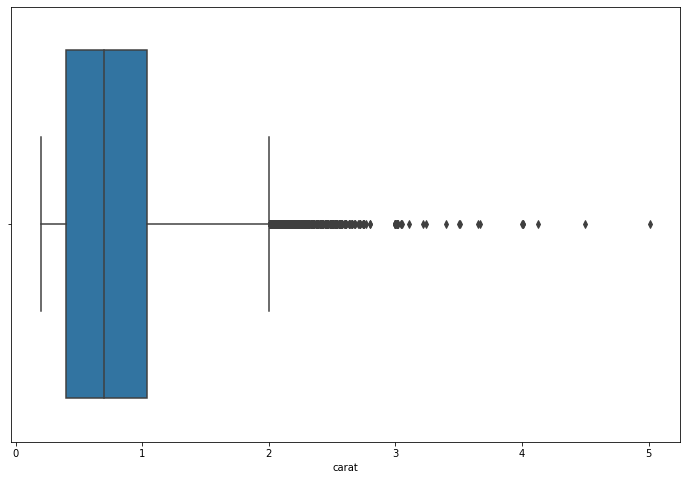

In [172]:
sns.boxplot(data['carat'])

**Try it Yourself**


What does the box plot for `price` and `depth` look like?

Finally, let's have a look at some time trends. We will look at another dataset for flights. The fun thing about seaborn is that it contains some of its own datasets to play with. You can run `sns.get_dataset_names()` to view available datasets.

In [180]:
sns.get_dataset_names()

C:\Users\saarah.rasheed\Anaconda3\lib\site-packages\seaborn\utils.py:384: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file C:\Users\saarah.rasheed\Anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [181]:
# we will use the flights dataset. Let's have a look

In [182]:
flights_data = sns.load_dataset('flights')
flights_data.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


Great this contains time series data of number of passsengers against each year. We can visualize a timeseries trend using `lineplot` in seaborn. 

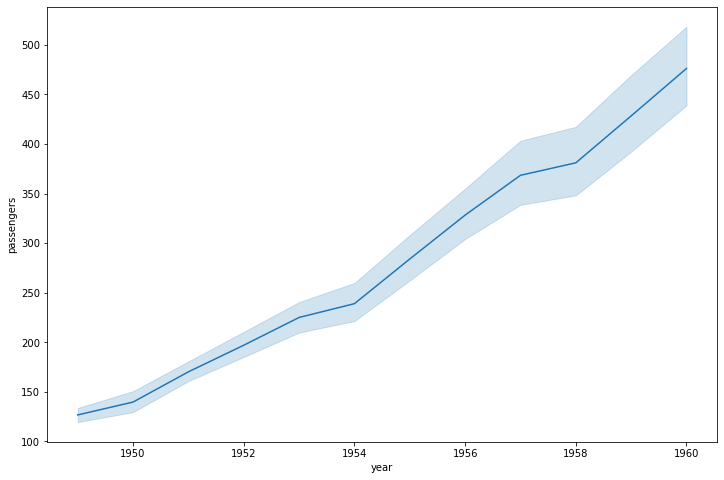

In [184]:
# draw line plot
sns.lineplot(x=flights_data['year'], y=flights_data['passengers'])
# alt declaration
# sns.lineplot(data=flights_data, x='year', y='passengers')

A beautiful chart is shown here that not just draws the line plot but also automatically aggregates repeated values for each year (we have 12 months a year!) and creates a confidence interval (light blue fatter shape) around the average value (the dark blue line). We will learn more about these statistical terms. For now its enough to know that it plots out the possible range of values for each year! That's pretty cool.

**Try it Yourself**

<!-- Note that these datasets are clean so you do not need to think about the cleaning exercise for now! -->
Explore the car crashes dataset. Perform the following:
- Explore column data types 
- Jot down questions you can try to answer using visualizations 
- How many univariate and how many multivariate visuals can you create?
- Use only seaborn for your visuals.